# Project Layout
The aim of this project is to perform player clustering and define which are the new roles of modern football.
The idea is to gruop players based on their tendencies and playstyle, forming clusters of physical player

In [1]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mplsoccer import Pitch
import math

# The data
Extact event data from StatsBomb

In [15]:
real_madrid_matches=get_matches(competition_id=11, season_id=27, team='Real Madrid')
barca_matches=get_matches(competition_id=11, season_id=27, team='Barcelona')
atleti_matches=get_matches(competition_id=11, season_id=27, team='Atlético Madrid')
sevilla_matches=get_matches(competition_id=11, season_id=27, team='Sevilla')
real_madrid_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
9,3825846,2016-05-14,17:00:00.000,Spain - La Liga,2015/2016,RC Deportivo La Coruña,Real Madrid,0,2,available,...,None,38,Regular Season,Estadio Abanca-Riazor,Antonio Miguel Mateu Lahoz,Víctor Sánchez del Amo,Zinédine Zidane,1.1.0,2,2
37,3825833,2016-04-16,16:00:00.000,Spain - La Liga,2015/2016,Getafe,Real Madrid,1,5,available,...,None,33,Regular Season,Coliseum Alfonso Pérez,José Luis González González,Juan Eduardo Esnáider Belén,Zinédine Zidane,1.1.0,2,2
53,3825820,2016-03-20,21:30:00.000,Spain - La Liga,2015/2016,Real Madrid,Sevilla,4,0,available,...,None,30,Regular Season,Estadio Santiago Bernabéu,Xavier Estrada Fernández,Zinédine Zidane,Unai Emery Etxegoien,1.1.0,2,2
75,3825757,2016-01-31,21:30:00.000,Spain - La Liga,2015/2016,Real Madrid,Espanyol,6,0,available,...,None,22,Regular Season,Estadio Santiago Bernabéu,Alejandro José Hernández Hernández,Zinédine Zidane,Constantin Gâlcă,1.1.0,2,2
82,3825798,2016-03-02,22:00:00.000,Spain - La Liga,2015/2016,Levante UD,Real Madrid,1,3,available,...,None,27,Regular Season,Estadio Ciudad de Valencia,Ricardo De Burgos Bengoetxea,Joan Francesc Ferrer Sicilia,Zinédine Zidane,1.1.0,2,2
91,3825787,2016-02-27,17:00:00.000,Spain - La Liga,2015/2016,Real Madrid,Atlético Madrid,0,1,available,...,None,26,Regular Season,Estadio Santiago Bernabéu,Carlos Clos Gómez,Zinédine Zidane,Diego Pablo Simeone,1.1.0,2,2
95,3825785,2016-02-21,17:00:00.000,Spain - La Liga,2015/2016,Málaga,Real Madrid,1,1,available,...,None,25,Regular Season,Estadio La Rosaleda,Ignacio Iglesias Villanueva,,Zinédine Zidane,1.1.0,2,2
103,3825770,2016-02-13,17:00:00.000,Spain - La Liga,2015/2016,Real Madrid,Athletic Club,4,2,available,...,None,24,Regular Season,Estadio Santiago Bernabéu,Alfonso Álvarez Izquierdo,Zinédine Zidane,Ernesto Valverde Tejedor,1.1.0,2,2
108,3825678,2015-11-29,17:00:00.000,Spain - La Liga,2015/2016,Eibar,Real Madrid,0,2,available,...,None,13,Regular Season,Estadio Municipal de Ipurúa,Jesús Gil Manzano,José Luis Mendilibar Etxebarria,Rafael Benítez Maudes,1.1.0,2,2
109,3825643,2015-10-31,17:00:00.000,Spain - La Liga,2015/2016,Real Madrid,Las Palmas,3,1,available,...,None,10,Regular Season,Estadio Santiago Bernabéu,Santiago Jaime Latre,Rafael Benítez Maudes,Enrique Setién Solar,1.1.0,2,2


In [ ]:
real_madrid_matches=get_matches(competition_id=11, season_id=27, team='Real Madrid')
real_madrid_matches.head(1)

In [77]:
sb.lineups(match_id=267533)['Real Madrid']

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3063,Danilo Luiz da Silva,Danilo,23,Brazil,[],[]
1,3990,Jesé Rodríguez Ruiz,Jesé,20,Spain,[],"[{'position_id': 23, 'position': 'Center Forwa..."
2,4926,Francisco Román Alarcón Suárez,Isco,22,Spain,[],[]
3,5200,Lucas Vázquez Iglesias,Lucas Vázquez,18,Spain,[],"[{'position_id': 17, 'position': 'Right Wing',..."
4,5201,Sergio Ramos García,Sergio Ramos,4,Spain,"[{'time': '09:16', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B..."
5,5202,José Ignacio Fernández Iglesias,Nacho,6,Spain,[],[]
6,5207,Cristiano Ronaldo dos Santos Aveiro,Cristiano Ronaldo,7,Portugal,"[{'time': '80:02', 'card_type': 'Yellow Card',...","[{'position_id': 21, 'position': 'Left Wing', ..."
7,5463,Luka Modrić,None,19,Croatia,[],"[{'position_id': 13, 'position': 'Right Center..."
8,5539,Carlos Henrique Casimiro,Casemiro,14,Brazil,[],"[{'position_id': 10, 'position': 'Center Defen..."
9,5552,Marcelo Vieira da Silva Júnior,Marcelo,12,Brazil,[],"[{'position_id': 6, 'position': 'Left Back', '..."


In [16]:
players=sb.lineups(match_id=267533)['Real Madrid'].append(sb.lineups(match_id=267533)['Barcelona'])
players=players.append(sb.lineups(match_id=3825621)['Atlético Madrid'])
players=players.append(sb.lineups(match_id=3825661)['Sevilla'])
players=players[['player_name','player_nickname']].reset_index()
players

,index,player_name,player_nickname
0,0,Danilo Luiz da Silva,Danilo
1,1,Jesé Rodríguez Ruiz,Jesé
2,2,Francisco Román Alarcón Suárez,Isco
3,3,Lucas Vázquez Iglesias,Lucas Vázquez
4,4,Sergio Ramos García,Sergio Ramos
...,...,...,...
67,13,Yevhen Konoplyanka,Yevgen Konoplyanka
68,14,Timothée Kolodziejczak,Kolo
69,15,Mariano Ferreira Filho,Mariano
70,16,José Antonio Reyes Calderón,José Antonio Reyes


In [17]:
matches=[real_madrid_matches,barca_matches, atleti_matches,sevilla_matches]
all_players_spm=np.empty((0,24,24))
for index, player in players.iterrows():
    i=math.floor(index/18)
    print(i)
    print(player)
    all_players_spm=np.append(all_players_spm, [season_pass_matrix(matches=matches[i], player=player['player_name'])],axis=0)

0
index                                 0
player_name        Danilo Luiz da Silva
player_nickname                  Danilo
Name: 0, dtype: object
0
index                                1
player_name        Jesé Rodríguez Ruiz
player_nickname                   Jesé
Name: 1, dtype: object
0
index                                           2
player_name        Francisco Román Alarcón Suárez
player_nickname                              Isco
Name: 2, dtype: object
0
index                                   3
player_name        Lucas Vázquez Iglesias
player_nickname             Lucas Vázquez
Name: 3, dtype: object
0
index                                4
player_name        Sergio Ramos García
player_nickname           Sergio Ramos
Name: 4, dtype: object
0
index                                            5
player_name        José Ignacio Fernández Iglesias
player_nickname                              Nacho
Name: 5, dtype: object
0
index                                                6
player_nam

3
index                                     1
player_name        Fernando Llorente Torres
player_nickname           Fernando Llorente
Name: 55, dtype: object
3
index                                        2
player_name        Vicente Iborra De La Fuente
player_nickname                 Vicente Iborra
Name: 56, dtype: object
3
index                                3
player_name        Grzegorz Krychowiak
player_nickname                   None
Name: 57, dtype: object
3
index                                          4
player_name        Éver Maximiliano David Banega
player_nickname                      Éver Banega
Name: 58, dtype: object
3
index                                                        5
player_name        Steven N''Kemboanza Mike Christopher Nzonzi
player_nickname                                  Steven Nzonzi
Name: 59, dtype: object
3
index                                6
player_name        Michael Krohn-Dehli
player_nickname                   None
Name: 60, dtype: object
3

In [230]:
all_players_spm.shape

(36, 24, 24)

In [18]:
file_path = "all_players_spm.npy"

# Save the NumPy array to a file
np.save(file_path, all_players_spm)

In [19]:
# Later, when you want to load the array from the file
loaded_array = np.load(file_path)

# Now, 'loaded_array' contains the data from the saved file
loaded_array

array([[[ 4.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  2.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  2.,  1.,  1.],
        [ 0.,  0.,  0., ...,  7., 10.,  0.],
        [ 0.,  0.,  0., ..., 14., 27., 11.]],

       [[ 1.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 13.,  8.,  1.],
        [ 0.,  0.,  0., ...,  7., 11.,  2.],
        [ 0.,  0.,  0., ...,  5., 11.,  7.]],

       [[ 2.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  9.,  5.,  1.],
        [ 0.,  0.,  0., ...,  3.,  7.,  3.],
        [ 0.,  0.,  0., ...,  8., 13., 11.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  9., ...,  0.,  0.,  0.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from sklearn.metrics import jaccard_score

In [22]:
flattened_matrices = [matrix.flatten() for matrix in all_players_spm]

# Calculate cosine similarity between each pair of flattened matrices
cosine_similarities = cosine_similarity(flattened_matrices, flattened_matrices)

# Create a distance matrix (1 - similarity) to represent dissimilarity
distance_matrix = 1 - cosine_similarities

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[ 1.11022302e-16  4.60403750e-01  4.24758431e-01 ...  2.34537117e-01
   3.44318709e-01  7.80190838e-01]
 [ 4.60403750e-01  2.22044605e-16  2.71144073e-01 ...  5.12707142e-01
   3.11808923e-01  4.57151805e-01]
 [ 4.24758431e-01  2.71144073e-01 -6.66133815e-16 ...  6.08878480e-01
   3.36303688e-01  3.98000746e-01]
 ...
 [ 2.34537117e-01  5.12707142e-01  6.08878480e-01 ...  0.00000000e+00
   3.13142817e-01  9.83209115e-01]
 [ 3.44318709e-01  3.11808923e-01  3.36303688e-01 ...  3.13142817e-01
   0.00000000e+00  6.39328060e-01]
 [ 7.80190838e-01  4.57151805e-01  3.98000746e-01 ...  9.83209115e-01
   6.39328060e-01 -4.44089210e-16]]


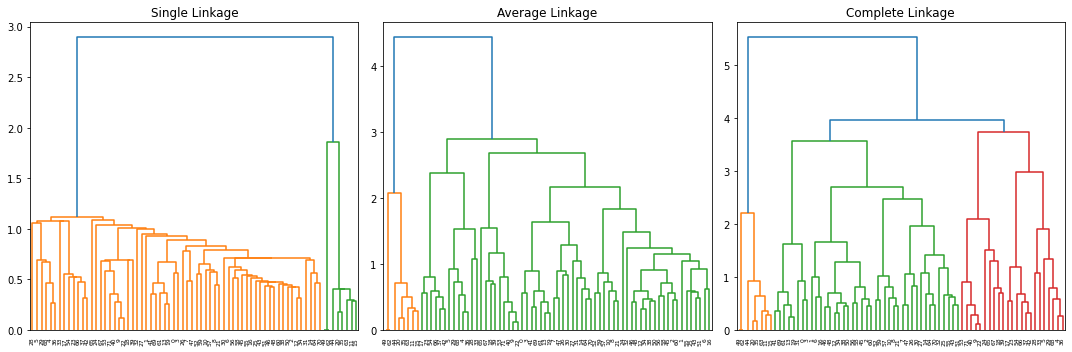

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Perform hierarchical clustering with different linkage methods
single_linkage = linkage(distance_matrix, method='single')
average_linkage = linkage(distance_matrix, method='average')
complete_linkage = linkage(distance_matrix, method='complete')

# Create a subplot for the dendrograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the dendrogram for single linkage
dendrogram(single_linkage, ax=axes[0])
axes[0].set_title('Single Linkage')

# Plot the dendrogram for average linkage
dendrogram(average_linkage, ax=axes[1])
axes[1].set_title('Average Linkage')

# Plot the dendrogram for complete linkage
dendrogram(complete_linkage, ax=axes[2])
axes[2].set_title('Complete Linkage')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
single_clusters = fcluster(single_linkage, t=0.8, criterion='distance')
for i in range(1,len(np.unique(single_clusters))+1):
    print(f"cluster {i}")
    print(players[single_clusters==i])

cluster 1
    index                      player_name player_nickname
4       4              Sergio Ramos García    Sergio Ramos
5       5  José Ignacio Fernández Iglesias           Nacho
29     11                 Thomas Vermaelen            None
36      0         Diego Roberto Godín Leal     Diego Godín
68     14           Timothée Kolodziejczak            Kolo
cluster 2
    index                  player_name    player_nickname
28     10  Javier Alejandro Mascherano  Javier Mascherano
cluster 3
    index                   player_name player_nickname
17     17  Kléper Laveran Lima Ferreira            Pepe
23      5         Gerard Piqué Bernabéu    Gerard Piqué
37      1  José María Giménez de Vargas    José Giménez
42      6                  Stefan Savić            None
54      0                     Adil Rami            None
66     12               Marco Andreolli            None
cluster 4
    index          player_name player_nickname
33     15  Marc Bartra Aregall     Marc Bartra
clus

In [35]:
average_clusters = fcluster(average_linkage, t=1.1, criterion='distance')
for i in range(1,len(np.unique(average_clusters))+1):
    print(f"cluster {i}")
    print(players[average_clusters==i])

cluster 1
    index              player_name    player_nickname
49     13  Miguel Ángel Moyà Rumbo  Miguel Ángel Moyá
62      8        David Soria Solís        David Soria
cluster 2
    index                 player_name        player_nickname
11     11         Keylor Navas Gamboa           Keylor Navas
15     15    Francisco Casilla Cortés           Kiko Casilla
20      2  Claudio Andrés Bravo Muñoz          Claudio Bravo
35     17       Marc-André ter Stegen  Marc-André ter Stegen
44      8                   Jan Oblak                   None
63      9        Sergio Rico González            Sergio Rico
cluster 3
    index                   player_name player_nickname
17     17  Kléper Laveran Lima Ferreira            Pepe
23      5         Gerard Piqué Bernabéu    Gerard Piqué
37      1  José María Giménez de Vargas    José Giménez
42      6                  Stefan Savić            None
54      0                     Adil Rami            None
66     12               Marco Andreolli      

In [65]:
complete_clusters = fcluster(complete_linkage, t=1.2, criterion='distance')
for i in range(1,len(np.unique(complete_clusters))+1):  
    print(f"cluster {i}")
    print(players[complete_clusters==i])
    x=np.zeros([24,24])
    for spm in all_players_spm[complete_clusters==i]:
        x=x+spm
    x=x/(complete_clusters==i).sum()
    # Flatten the matrix and get indices of the sorted values in descending order
    flat_matrix = x.flatten()
    sorted_indices = np.argsort(flat_matrix)[::-1]

    # Get the indices of the top 10 values
    top_10_indices = sorted_indices[:10]

    # Convert the flattened indices back to row and column indices
    row_indices, col_indices = np.unravel_index(top_10_indices, x.shape)

    # Get the values and their corresponding row and column indices
    top_10_values = flat_matrix[top_10_indices]

    # Print the top 10 values and their positions
    for i in range(10):
        print(f"Value: {round(top_10_values[i],1)}, Row: {row_indices[i]}, Column: {col_indices[i]}")


cluster 1
    index              player_name    player_nickname
49     13  Miguel Ángel Moyà Rumbo  Miguel Ángel Moyá
62      8        David Soria Solís        David Soria
Value: 0.0, Row: 23, Column: 23
Value: 0.0, Row: 23, Column: 22
Value: 0.0, Row: 8, Column: 3
Value: 0.0, Row: 8, Column: 2
Value: 0.0, Row: 8, Column: 1
Value: 0.0, Row: 8, Column: 0
Value: 0.0, Row: 7, Column: 23
Value: 0.0, Row: 7, Column: 22
Value: 0.0, Row: 7, Column: 21
Value: 0.0, Row: 7, Column: 20
cluster 2
    index                 player_name        player_nickname
11     11         Keylor Navas Gamboa           Keylor Navas
15     15    Francisco Casilla Cortés           Kiko Casilla
20      2  Claudio Andrés Bravo Muñoz          Claudio Bravo
35     17       Marc-André ter Stegen  Marc-André ter Stegen
44      8                   Jan Oblak                   None
63      9        Sergio Rico González            Sergio Rico
Value: 41.0, Row: 2, Column: 14
Value: 37.2, Row: 1, Column: 5
Value: 28.8, Row: 2,

In [69]:
def normalize_spm(spm):
    normalized_spm = np.copy(spm)  # Create a copy of the original matrix
    for i in range(spm.shape[0]):
        if not np.allclose(spm[i], 0):  # Check if the row is not all zeros
            row_mean = np.mean(spm[i])
            row_std = np.std(spm[i])
            normalized_spm[i] = (spm[i] - row_mean) / row_std
    return normalized_spm

In [93]:
rm_spm=squad_spm(all_players_spm[0:18])
barca_spm=squad_spm(all_players_spm[18:36])
am_spm=squad_spm(all_players_spm[36:54])
sv_spm=squad_spm(all_players_spm[54:])
squad_spms=[rm_spm,barca_spm,am_spm,sv_spm]

In [99]:
all_players_spm_std=np.empty([0,24,24])
for index, player in players.iterrows():
    i=math.floor(index/18)
    matrix=(all_players_spm[index]/squad_spms[i])
    mask = np.isnan(matrix)
    matrix[mask] = 0
    all_players_spm_std=np.append(all_players_spm_std, [matrix],axis=0)
all_players_spm_std.shape

<ipython-input-99-3182ae77c7a7>:4: RuntimeWarning: invalid value encountered in true_divide
  matrix=(all_players_spm[index]/squad_spms[i])


(72, 24, 24)

In [100]:
flattened_matrices = [matrix.flatten() for matrix in all_players_spm_std]

# Calculate cosine similarity between each pair of flattened matrices
cosine_similarities = cosine_similarity(flattened_matrices, flattened_matrices)

# Create a distance matrix (1 - similarity) to represent dissimilarity
distance_matrix = 1 - cosine_similarities

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[2.22044605e-16 8.98527130e-01 8.85166717e-01 ... 6.05273216e-01
  8.49538401e-01 9.23245179e-01]
 [8.98527130e-01 0.00000000e+00 8.14256996e-01 ... 8.93505902e-01
  8.98100963e-01 8.74931082e-01]
 [8.85166717e-01 8.14256996e-01 2.22044605e-16 ... 7.77888174e-01
  7.38071101e-01 8.19252799e-01]
 ...
 [6.05273216e-01 8.93505902e-01 7.77888174e-01 ... 1.11022302e-16
  7.96314788e-01 9.72401951e-01]
 [8.49538401e-01 8.98100963e-01 7.38071101e-01 ... 7.96314788e-01
  0.00000000e+00 8.78619193e-01]
 [9.23245179e-01 8.74931082e-01 8.19252799e-01 ... 9.72401951e-01
  8.78619193e-01 2.22044605e-16]]


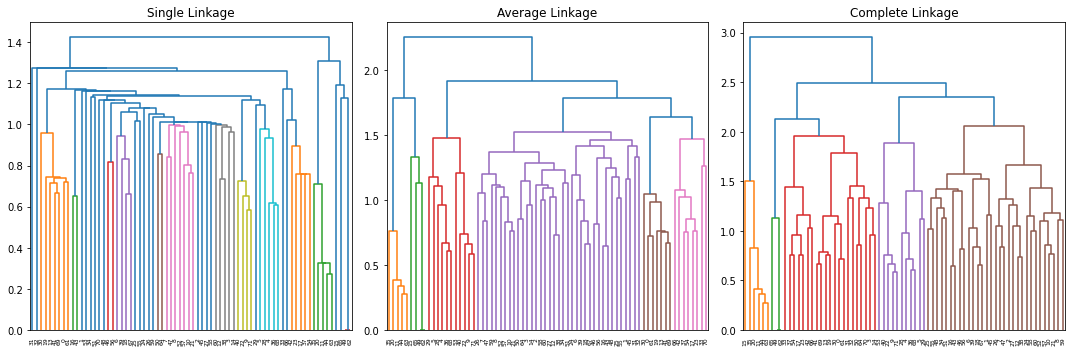

In [101]:
# Perform hierarchical clustering with different linkage methods
single_linkage = linkage(distance_matrix, method='single')
average_linkage = linkage(distance_matrix, method='average')
complete_linkage = linkage(distance_matrix, method='complete')

# Create a subplot for the dendrograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the dendrogram for single linkage
dendrogram(single_linkage, ax=axes[0])
axes[0].set_title('Single Linkage')

# Plot the dendrogram for average linkage
dendrogram(average_linkage, ax=axes[1])
axes[1].set_title('Average Linkage')

# Plot the dendrogram for complete linkage
dendrogram(complete_linkage, ax=axes[2])
axes[2].set_title('Complete Linkage')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [106]:
complete_clusters = fcluster(complete_linkage, t=1.3, criterion='distance')
for i in range(1,len(np.unique(complete_clusters))+1):  
    print(f"cluster {i}")
    print(players[complete_clusters==i])
    x=np.zeros([24,24])
    for spm in all_players_spm[complete_clusters==i]:
        x=x+spm
    x=x/(complete_clusters==i).sum()
    # Flatten the matrix and get indices of the sorted values in descending order
    flat_matrix = x.flatten()
    sorted_indices = np.argsort(flat_matrix)[::-1]

    # Get the indices of the top 10 values
    top_10_indices = sorted_indices[:10]

    # Convert the flattened indices back to row and column indices
    row_indices, col_indices = np.unravel_index(top_10_indices, x.shape)

    # Get the values and their corresponding row and column indices
    top_10_values = flat_matrix[top_10_indices]

    # Print the top 10 values and their positions
    for i in range(10):
        print(f"Value: {round(top_10_values[i],1)}, Row: {row_indices[i]}, Column: {col_indices[i]}")

cluster 1
    index                 player_name        player_nickname
11     11         Keylor Navas Gamboa           Keylor Navas
20      2  Claudio Andrés Bravo Muñoz          Claudio Bravo
35     17       Marc-André ter Stegen  Marc-André ter Stegen
44      8                   Jan Oblak                   None
63      9        Sergio Rico González            Sergio Rico
Value: 48.2, Row: 2, Column: 14
Value: 43.6, Row: 1, Column: 5
Value: 33.4, Row: 1, Column: 12
Value: 33.4, Row: 2, Column: 6
Value: 32.4, Row: 2, Column: 5
Value: 31.4, Row: 1, Column: 4
Value: 30.4, Row: 1, Column: 0
Value: 30.2, Row: 1, Column: 13
Value: 30.0, Row: 2, Column: 13
Value: 28.8, Row: 2, Column: 7
cluster 2
    index               player_name player_nickname
15     15  Francisco Casilla Cortés    Kiko Casilla
Value: 6.0, Row: 2, Column: 6
Value: 5.0, Row: 1, Column: 4
Value: 5.0, Row: 2, Column: 14
Value: 5.0, Row: 1, Column: 5
Value: 4.0, Row: 1, Column: 1
Value: 4.0, Row: 2, Column: 7
Value: 4.0, Row

In [82]:
def squad_spm(all_squad_spm):
    squad_spm=np.zeros([24,24])
    for spm in all_squad_spm:
        squad_spm=squad_spm+spm
    return squad_spm

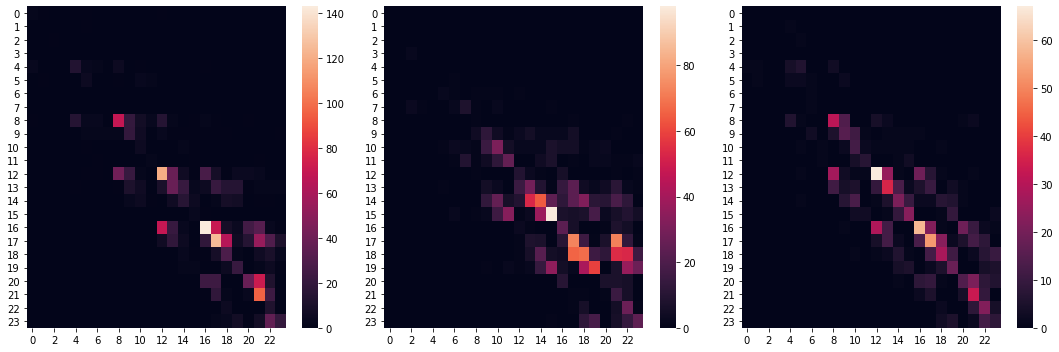

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(nj_spm,ax=axes[0])
sns.heatmap(lm_spm,ax=axes[1])
sns.heatmap(cb_sbm,ax=axes[2])
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
mat1=nj_spm
mat2=cb_sbm
sim=np.zeros(2)
sim[0]=cosine_similarity(mat1.reshape(1, -1), mat2.reshape(1, -1))[0, 0]
sim[1],_ = pearsonr(mat1.flatten(), mat2.flatten())
sim


array([0.91014218, 0.90408499])

In [28]:
season_passes=pd.DataFrame()
matches=real_madrid_matches
player='Toni Kroos'
for index, match in matches.iterrows():
    match_id=match['match_id']
    passes=get_events(match_id=match_id,event_type='Pass', player=player)
    if len(passes)>0:
        passes=prepare_passes(passes)
        season_passes=season_passes.append(passes)
season_passes

,start_zone,end_zone,pass_outcome,x,y,end_x,end_y
20,9,15,NaN,56.9,23.0,78.5,76.0
28,14,14,Incomplete,67.3,41.6,69.7,40.1
30,10,16,Incomplete,55.4,42.8,90.5,18.7
52,17,18,NaN,90.2,23.2,81.1,43.1
86,9,8,NaN,48.6,22.4,57.3,3.8
...,...,...,...,...,...,...,...
1063,5,5,NaN,39.8,28.5,27.3,29.8
1066,9,8,Incomplete,59.0,20.2,56.0,10.3
1120,7,6,NaN,35.9,60.2,27.6,47.5
1133,24,16,NaN,120.0,0.1,90.4,19.9


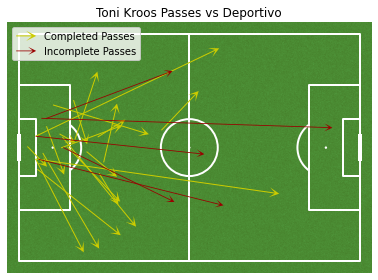

In [36]:
pass_arrows(prepare_passes(get_events(match_id=267533,event_type='Pass',player='Claudio Andrés Bravo Muñoz')))#Barca out

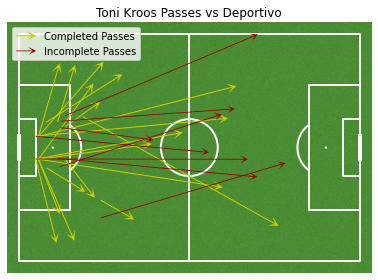

In [37]:
pass_arrows(prepare_passes(get_events(match_id=267533,event_type='Pass',player='Keylor Navas Gamboa')))#Barca home

In [141]:
((season_passes['start_zone']==3) | (season_passes['end_zone']==2)).mean()

0.006269592476489028

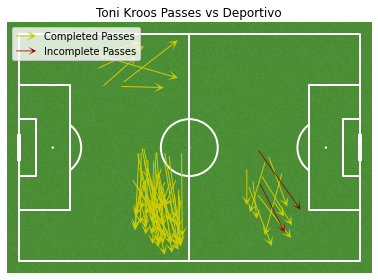

In [144]:
mask1=(season_passes['start_zone']==10) & (season_passes['end_zone']==11)
mask2=(season_passes['start_zone']==18) & (season_passes['end_zone']==19)
mask3=(season_passes['start_zone']==4) & (season_passes['end_zone']==8)
mask= mask1 | mask2 | mask3
pass_arrows(season_passes[mask])

       x     y  end_x  end_y
0   49.2  48.4   53.7   73.2
1   45.5  44.4   44.7   70.5
2   49.8  59.4   46.5   70.4
3   27.9   7.0   42.4    3.1
4   87.9  43.2   94.4   60.7
..   ...   ...    ...    ...
59  50.9  54.4   53.9   77.0
60  49.3  51.9   55.9   74.4
61  45.1  58.7   42.7   61.0
62  36.1  18.5   51.0   18.9
63  48.9  49.5   46.8   66.3

[64 rows x 4 columns]


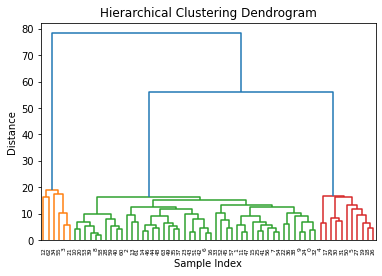

In [150]:
X=season_passes[mask].reset_index()
X=X.iloc[:,4:]
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering with Euclidean distance and average linkage
linkage_matrix = linkage(X, method='average', metric='euclidean')

# Plot the dendrogram
dendrogram(linkage_matrix, labels=X.index.tolist(), orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [152]:
num_clusters = 3
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
cluster_passes=pd.DataFrame(columns=['x','y','end_x','end_y'])
for i in range(1,len(np.unique(clusters))+1):
    cluster_passes.loc[len(cluster_passes)]=(X.iloc[clusters==i,:].mean())
cluster_passes

,x,y,end_x,end_y
0,30.866667,13.300000,48.450000,8.716667
1,48.240426,50.053191,50.146809,69.102128
2,85.409091,50.109091,90.263636,66.254545


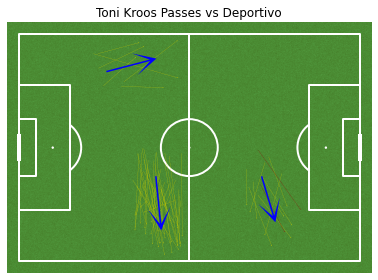

In [158]:
pass_clusters(season_passes[mask],cluster_passes)

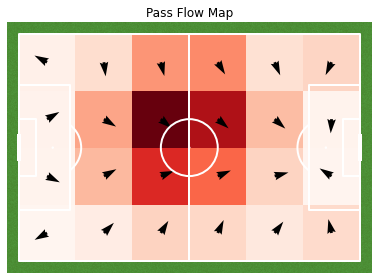

In [159]:
pass_flow_map(season_passes)

# Functions

In [3]:
def get_matches(competition_id, season_id, team=None):
    df=sb.matches(competition_id, season_id)
    if team!=None:
        df=df[(df['home_team']==team) | (df['away_team']==team)]
    return df

In [4]:
def get_events(match_id, event_type=None, player=None, team=None):
    df=sb.events(match_id=match_id)
    if event_type!=None:
        df=df[df['type']==event_type]
    if team != None:
        df=df[df['team']==team]
    if player!=None:
        df=df[df['player']==player]
    return df

In [5]:
def assign_startzone(pass_location):
    x=pass_location['x']
    y=pass_location['y']
    return 4*math.floor(x/20)+math.floor(y/20)
        
def assign_endzone(pass_location):
    x=pass_location['end_x']
    y=pass_location['end_y']
    return 4*math.floor(x/20)+math.floor(y/20)

In [6]:
def prepare_passes(pass_df):
    pass_df[['x', 'y']] = pass_df['location'].apply(lambda x: pd.Series({'x': x[0], 'y': x[1]}))
    pass_df[['end_x', 'end_y']] = pass_df['pass_end_location'].apply(lambda x: pd.Series({'x': x[0], 'y': x[1]}))
    pass_df['start_zone']=pass_df.apply(assign_startzone,axis=1)
    pass_df['end_zone']=pass_df.apply(assign_endzone,axis=1)
    pass_df=pass_df[['start_zone', 'end_zone', 'pass_outcome','x','y','end_x','end_y']]
    return pass_df

In [7]:
def pass_network(match_id, team):
    event_df=get_events(match_id=match_id,team=team)
    pass_df = event_df[event_df.type == 'Pass']
    players_df=sb.lineups(match_id=match_id)[team]
    # boolean mask if the pass is completed
    pass_df[['x', 'y']] = pass_df['location'].apply(lambda x: pd.Series({'x': x[0], 'y': x[1]}))
    pass_df[['end_x', 'end_y']] = pass_df['pass_end_location'].apply(lambda x: pd.Series({'x': x[0], 'y': x[1]}))
    complete_pass_mask = pass_df.pass_outcome.isnull()
    completed_pass = pass_df[complete_pass_mask]
    # get first substitution minute
    subs = event_df[event_df.type == 'Substitution']
    first_sub_minute = subs['minute'].min()
    # passes before first sub
    completed_pass = completed_pass[completed_pass['minute'] < first_sub_minute]
    # players average passes location x, y , player_id => index
    avg_loc = completed_pass.groupby('player').agg({'x': ['mean'], 'y': ['mean']})
    avg_loc.columns = ['x', 'y']
    # pass between player_id and pass_recipient_id
    pass_between = completed_pass.groupby(['player', 'pass_recipient'], as_index=False).id.count()
    pass_between.columns = ['passer', 'recipient', 'passes_between']
    # merge avg_loc table with pass_between table throw passer column to get start x, y
    pass_between = pass_between.merge(avg_loc, left_on='passer', right_index=True)
    # merge avg_loc table with pass_between table throw recipient column to get end x, y
    pass_between = pass_between.merge(avg_loc, left_on='recipient', right_index=True, suffixes=['', '_end'])
    # setup the pitch
    pitch = Pitch(pitch_color='grass', line_color='white')
    fig, ax = pitch.draw()
    # plot passes network
    pitch.arrows(
        xstart=pass_between.x, ystart=pass_between.y, xend=pass_between.x_end,
        yend=pass_between.y_end, width=1, headwidth=10, headlength=30, color='#990000', ax=ax)
    # plot players
    pitch.scatter(
        x=pass_between.x, y=pass_between.y, s=250, color='red', edgecolor='black', linewidth=1, alpha=1, ax=ax)
    # plot players jersey number
    for index, row in avg_loc.iterrows():
        # index in avg_loc table is the player_id
        player_jersey_number = players_df[players_df.player_name == index].jersey_number.values[0]
        pitch.annotate(player_jersey_number, xy=(row.x, row.y), c='white', va='center', ha='center',
                       size=8, weight='bold', ax=ax)
    ax.set_title(f'{team} Pass Network')
    plt.show()


In [8]:
def pass_arrows(e):    
    pass_df = e
    # boolean mask if the pass is completed
    complete_pass_mask = pass_df.pass_outcome.isnull()
    completed_passes = pass_df[complete_pass_mask]
    incomplete_passes = pass_df[~complete_pass_mask]
    # setup the pitch
    pitch = Pitch(pitch_color='grass', line_color='white')
    fig, ax = pitch.draw()
    # plot the completed passes arrows
    pitch.arrows(
        xstart=completed_passes.x, ystart=completed_passes.y, xend=completed_passes.end_x,
        yend=completed_passes.end_y, width=1, ax=ax, headwidth=10, headlength=10, color='#cccc00',
        label='Completed Passes')
    # plot the Incomplete passes arrows
    pitch.arrows(
        xstart=incomplete_passes.x, ystart=incomplete_passes.y, xend=incomplete_passes.end_x,
        yend=incomplete_passes.end_y, width=0.8, ax=ax, headwidth=10, headlength=10, color='#990000',
        label='Incomplete Passes')
    # set the title
    ax.set_title('Toni Kroos Passes vs Deportivo')
    # set the legend
    ax.legend(loc='upper left')
    plt.show()

In [9]:
def print_pass_clusters(total_pass, clustered_passes):
    pass_df = total_pass
    # boolean mask if the pass is completed
    complete_pass_mask = pass_df.pass_outcome.isnull()
    completed_passes = pass_df[complete_pass_mask]
    incomplete_passes = pass_df[~complete_pass_mask]
    # setup the pitch
    pitch = Pitch(pitch_color='grass', line_color='white')
    fig, ax = pitch.draw()
    # plot the completed passes arrows
    pitch.arrows(
        xstart=completed_passes.x, ystart=completed_passes.y, xend=completed_passes.end_x,
        yend=completed_passes.end_y, width=0.2, ax=ax, headwidth=5, headlength=5, color='#cccc00',
        label='Completed Passes')
    # plot the Incomplete passes arrows
    pitch.arrows(
        xstart=incomplete_passes.x, ystart=incomplete_passes.y, xend=incomplete_passes.end_x,
        yend=incomplete_passes.end_y, width=0.2, ax=ax, headwidth=5, headlength=5, color='#990000',
        label='Incomplete Passes')
    #plot the clusters
    pitch.arrows(
        xstart=clustered_passes.x, ystart=clustered_passes.y, xend=clustered_passes.end_x,
        yend=clustered_passes.end_y, width=1.5, ax=ax, headwidth=15, headlength=15, color='#0000FF',
        label='Clustered Passes')
    # set the title
    ax.set_title('Toni Kroos Passes vs Deportivo')
    # set the legend
    #ax.legend(loc='upper left')
    plt.show()

In [10]:
def pass_flow_map(e):
    pass_df = e
    # setup the pitch
    pitch = Pitch(pitch_color='grass', line_color='white', line_zorder=2)
    fig, ax = pitch.draw()
    # plot the heatmap (darker color means more passes from that square)
    bins = (6, 4)  # divide pitch to 6 columns and 3 rows
    bins_heatmap = pitch.bin_statistic(pass_df.x, pass_df.y, statistic='count', bins=bins)
    pitch.heatmap(bins_heatmap, ax=ax, cmap='Reds')
    # plot the arrows pass flow
    pitch.flow(
        xstart=pass_df.x, ystart=pass_df.y, xend=pass_df.end_x, yend=pass_df.end_y,
        ax=ax, color='black', arrow_type='same', arrow_length=5, bins=bins
    )
    ax.set_title('Pass Flow Map')
    plt.show()

In [11]:
def complete_pass_matrix(pass_df):
    complete_pass_mask = pass_df.pass_outcome.isnull()
    completed_passes = pass_df[complete_pass_mask]
    all_combinations = pd.DataFrame(columns=['start_zone', 'end_zone'])

    for start in range(0, 24):
        for end in range(0, 24):
            all_combinations = all_combinations.append({'start_zone': start, 'end_zone': end}, ignore_index=True)



    # Count the occurrences of each combination in the original DataFrame
    count = pass_df.groupby(['start_zone', 'end_zone']).size().reset_index(name='count')

    # Merge the counts with all_combinations DataFrame and fill missing values with 0
    result = pd.merge(all_combinations, count, on=['start_zone', 'end_zone'], how='left').fillna(0)

    # Pivot the DataFrame to get the desired 24x24 matrix
    return result.pivot(index='start_zone', columns='end_zone', values='count').fillna(0).to_numpy()

In [12]:
def season_pass_matrix(matches, player):
    pass_matrix=np.zeros([24,24])
    for index, match in matches.iterrows():
        match_id=match['match_id']
        passes=get_events(match_id=match_id,event_type='Pass', player=player)
        if len(passes)>0:
            passes=prepare_passes(passes)
            pass_matrix=pass_matrix+complete_pass_matrix(passes)
    return pass_matrix